In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('..\dataset\Life_Expectancy_Data_Transformed_Final.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_60648\81295919.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('..\dataset\Life_Expectancy_Data_Transformed_Final.csv')


In [4]:
df.head()

,国家,年份,预期寿命,成人死亡率,婴儿死亡数,酒精消费,医疗支出百分比,乙肝疫苗接种率,麻疹病例数,BMI指数,...,总医疗支出,白喉疫苗接种率,HIV/AIDS死亡率,GDP,人口数量,1-19岁消瘦率,5-9岁消瘦率,收入构成资源,受教育年限,发展状态_数值
0,Afghanistan,2015.0,65.0,263.0,55.0,0.01,71.279624,65.0,900.625,19.1,...,8.16,65.0,0.1,584.259210,1.863166e+07,15.5375,15.6,0.479,10.1,0
1,Afghanistan,2014.0,59.9,271.0,55.0,0.01,73.523582,62.0,492.000,18.6,...,8.18,62.0,0.1,612.696514,3.275820e+05,15.5375,15.6,0.476,10.0,0
2,Afghanistan,2013.0,59.9,268.0,55.0,0.01,73.219243,64.0,430.000,18.1,...,8.13,64.0,0.1,631.744976,1.863166e+07,15.5375,15.6,0.470,9.9,0
3,Afghanistan,2012.0,59.5,272.0,55.0,0.01,78.184215,67.0,900.625,17.6,...,8.52,67.0,0.1,669.959000,3.696958e+06,15.5375,15.6,0.463,9.8,0
4,Afghanistan,2011.0,59.2,275.0,55.0,0.01,7.097109,68.0,900.625,17.2,...,7.87,68.0,0.1,63.537231,2.978599e+06,15.5375,15.6,0.454,9.5,0


C:\Users\HP\AppData\Local\Temp\ipykernel_60648\913286094.py:17: UserWarning: Glyph 244 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX}) missing from font(s) SimHei.
  plt.tight_layout()
d:\Develop\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 244 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


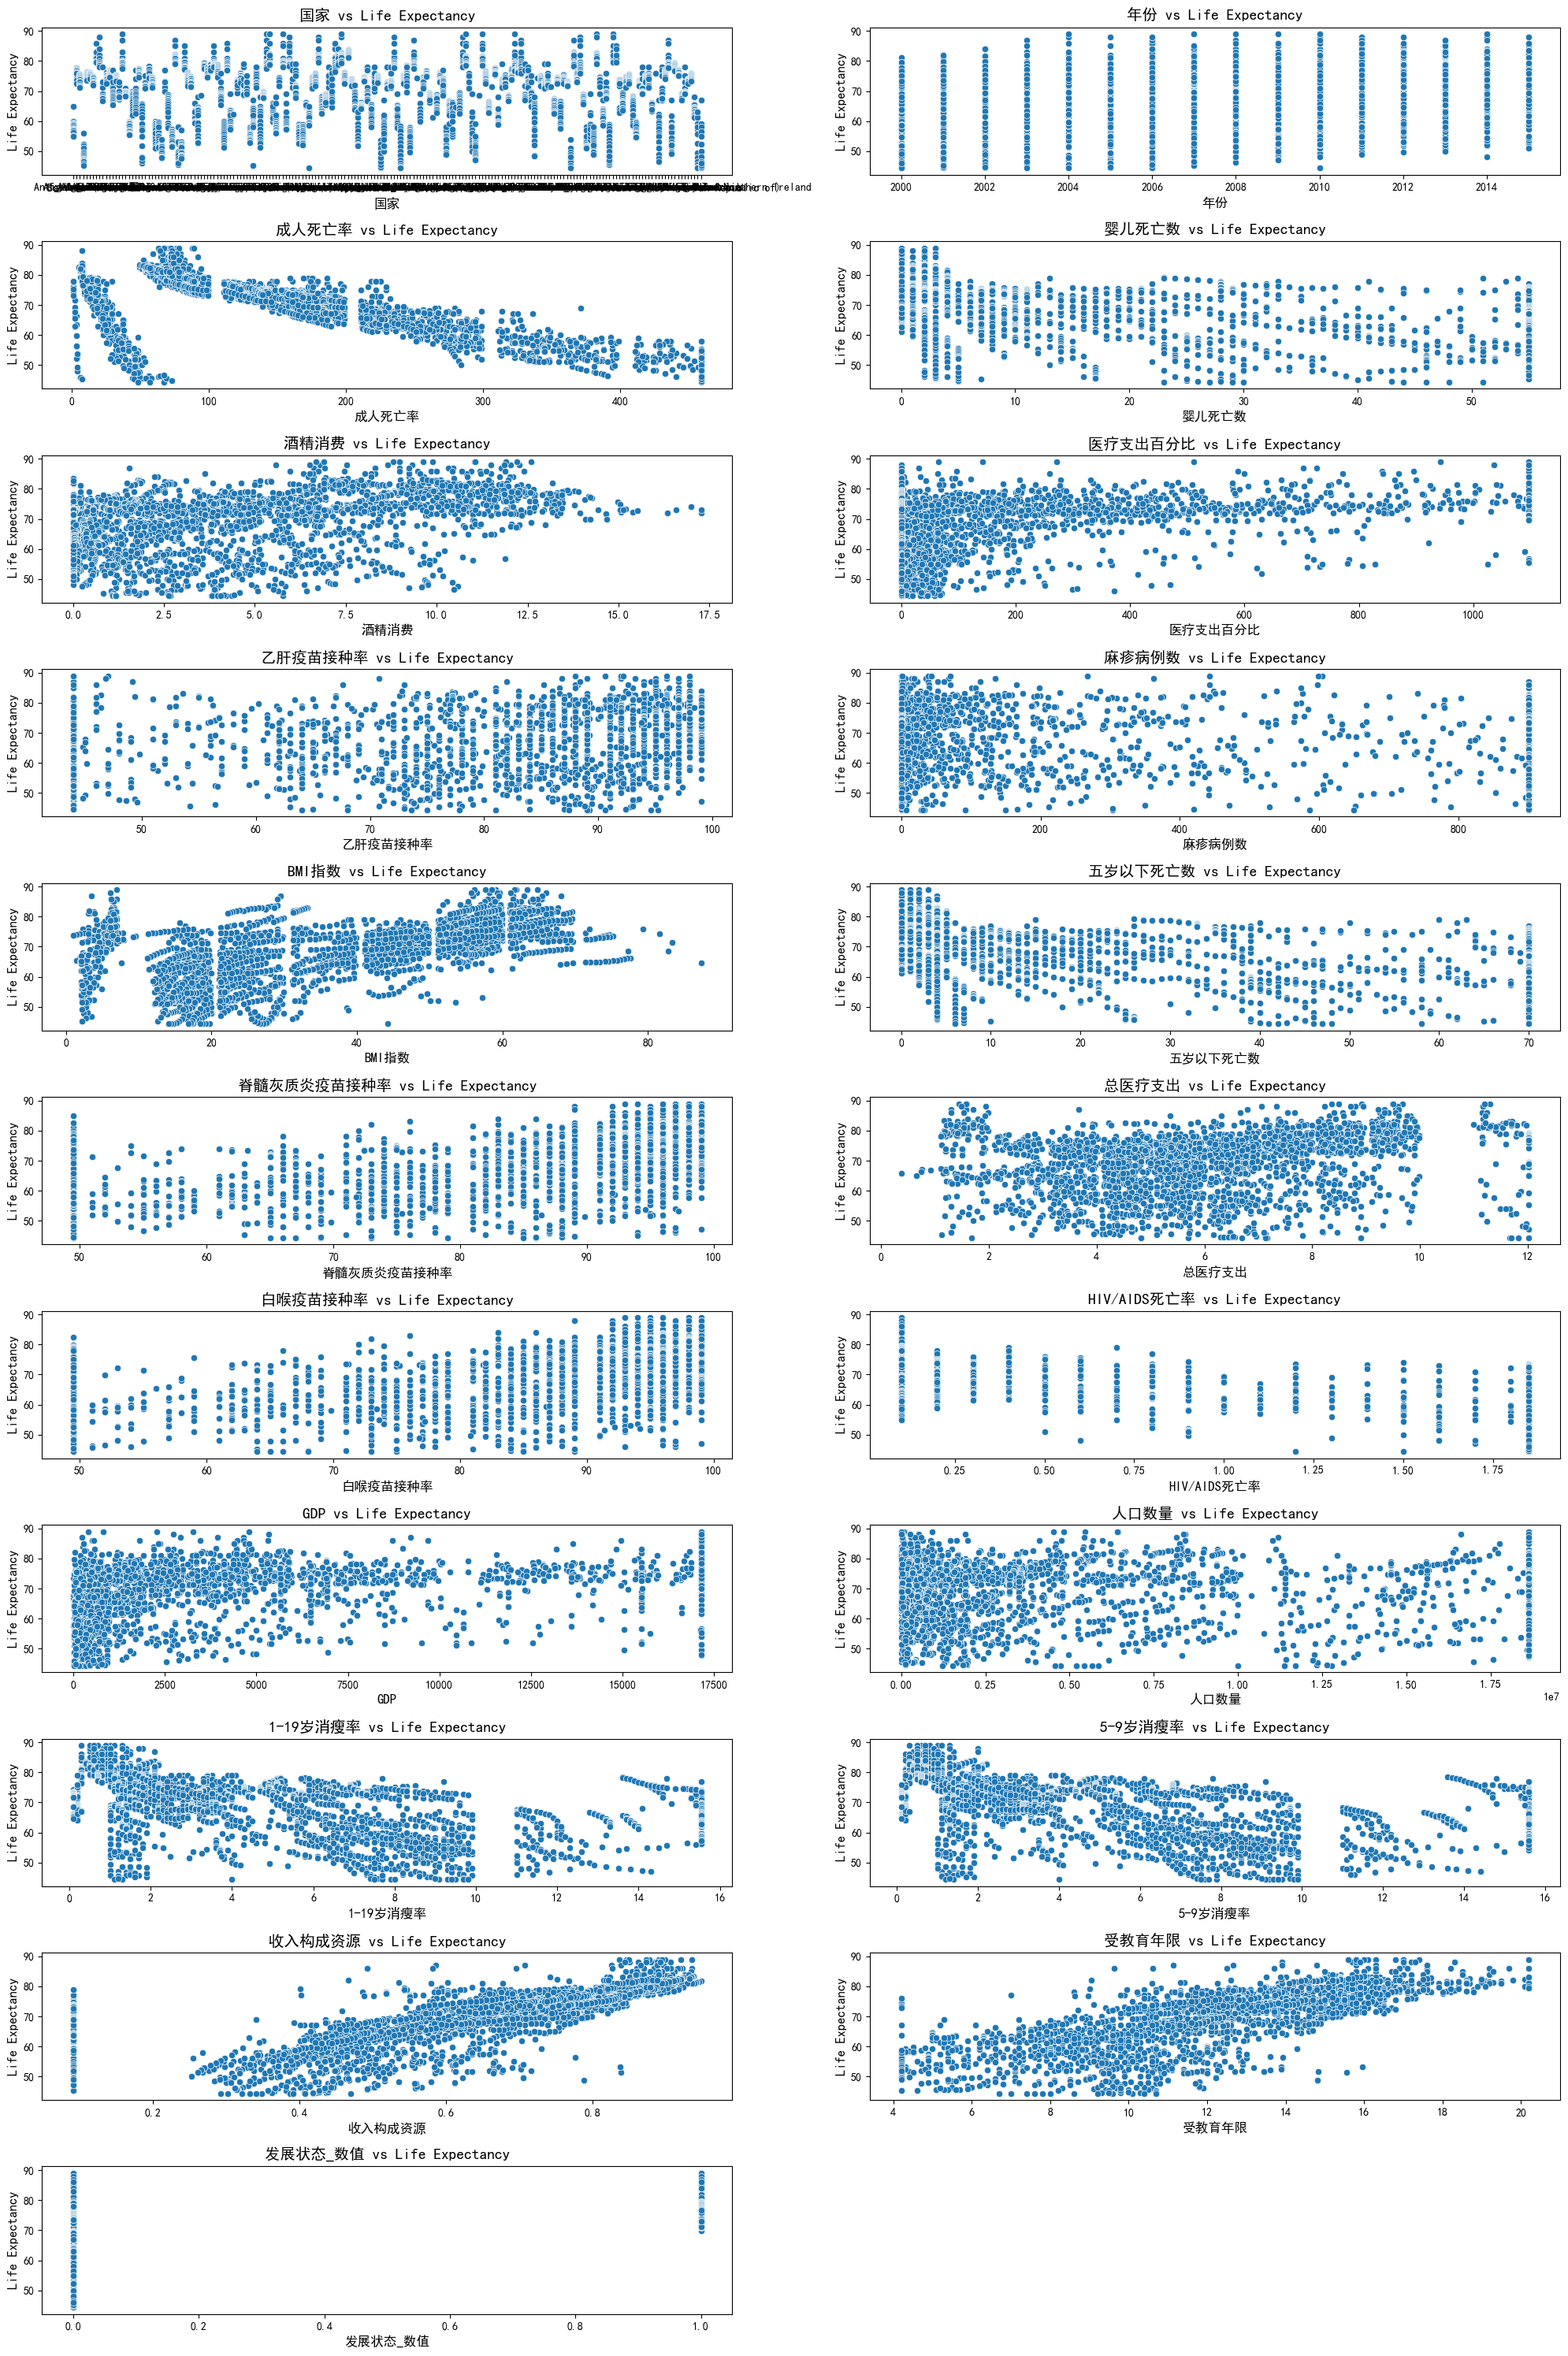

In [5]:
columns = [col for col in df.columns if col != '预期寿命']

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置图形大小
plt.figure(figsize=(20, 30))  # 调整图形大小，使图片更大

# 遍历每个特征列并绘制散点图
for i, col in enumerate(columns, 1):
    plt.subplot(len(columns) // 2 + 1, 2, i)  # 每行显示2个子图
    sns.scatterplot(x=df[col], y=df['预期寿命'])
    plt.title(f'{col} vs Life Expectancy', fontsize=14)  # 调整标题字体大小
    plt.xlabel(col, fontsize=12)  # 调整标签字体大小
    plt.ylabel('Life Expectancy', fontsize=12)

plt.tight_layout()
plt.show()

In [6]:
# 计算每个特征与目标变量的相关系数
for column in df.columns:
    if column != '预期寿命' and column!= '国家':
        correlation = df[column].corr(df['预期寿命'])
        print(f'Correlation between {column} and 预期寿命: {correlation:.2f}')

Correlation between 年份 and 预期寿命: 0.17
Correlation between 成人死亡率 and 预期寿命: -0.69
Correlation between 婴儿死亡数 and 预期寿命: -0.57
Correlation between 酒精消费 and 预期寿命: 0.39
Correlation between 医疗支出百分比 and 预期寿命: 0.49
Correlation between 乙肝疫苗接种率 and 预期寿命: 0.26
Correlation between 麻疹病例数 and 预期寿命: -0.34
Correlation between BMI指数 and 预期寿命: 0.56
Correlation between 五岁以下死亡数 and 预期寿命: -0.60
Correlation between 脊髓灰质炎疫苗接种率 and 预期寿命: 0.57
Correlation between 总医疗支出 and 预期寿命: 0.22
Correlation between 白喉疫苗接种率 and 预期寿命: 0.57
Correlation between HIV/AIDS死亡率 and 预期寿命: -0.80
Correlation between GDP and 预期寿命: 0.46
Correlation between 人口数量 and 预期寿命: -0.06
Correlation between 1-19岁消瘦率 and 预期寿命: -0.51
Correlation between 5-9岁消瘦率 and 预期寿命: -0.51
Correlation between 收入构成资源 and 预期寿命: 0.72
Correlation between 受教育年限 and 预期寿命: 0.73
Correlation between 发展状态_数值 and 预期寿命: 0.48


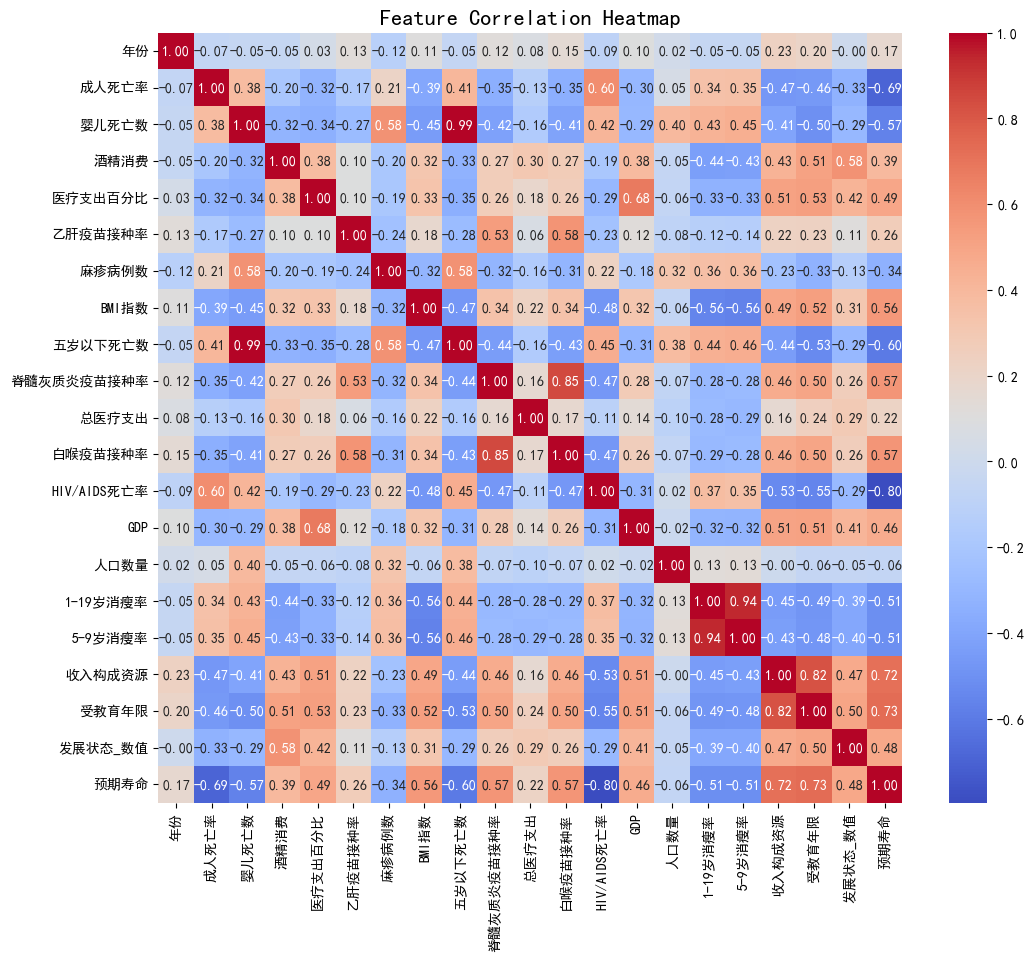

In [9]:
# 热力图
columns = [col for col in df.columns if col != '预期寿命' and col != '国家']

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置图形大小
plt.figure(figsize=(12, 10))  # 调整图形大小，使热力图更清晰

# 绘制热力图
sns.heatmap(df[columns + ['预期寿命']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=16)  # 设置标题字体大小
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['预期寿命','国家'])
y = df['预期寿命']

model = RandomForestRegressor()
model.fit(X, y)

importance = model.feature_importances_
for col, imp in zip(X.columns, importance):
    print(f"{col}: {imp}")

年份: 0.007898781264353607
成人死亡率: 0.1614018136574999
婴儿死亡数: 0.004505870936979072
酒精消费: 0.012983551768181957
医疗支出百分比: 0.0029116956617567377
乙肝疫苗接种率: 0.0020766176011731015
麻疹病例数: 0.0028177925149826095
BMI指数: 0.018992165436679722
五岁以下死亡数: 0.013152124670047107
脊髓灰质炎疫苗接种率: 0.0036476438391230275
总医疗支出: 0.005589184541197449
白喉疫苗接种率: 0.0036909889033856142
HIV/AIDS死亡率: 0.5836054477993071
GDP: 0.0033300083658569916
人口数量: 0.0028262391383791366
1-19岁消瘦率: 0.0065449724775418425
5-9岁消瘦率: 0.008655539362548814
收入构成资源: 0.12991899951292846
受教育年限: 0.024386631897602037
发展状态_数值: 0.001063930650475509
